# KNU 감성사전을 통한 단어의 긍정/부정을 판단하기

In [ ]:
import json
import pandas as pd
from tqdm import tqdm

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect("./drive/MyDrive/pratice.db") # practice.db 연결
c = conn.cursor() # db를 사용하기 위한 cursor

In [ ]:
c.execute("SELECT total_body FROM newss") # newspaper text(기사)의 내용을 추출

articles = [] # list 선언

for row in c.fetchall():  # table의 내용을 반복하여 추출
  articles.append(row)  # 해당 내용을 articles list에 넣음

단어 분석(Mecab)

In [ ]:
!python -m pip install konlpy

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!bash ./mecab.sh

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
# 의미 없는 단어(조사 등) 제외
stopwords = ['은', '도', '는', '다', '사', '의', '위', '제', '대', '회', '등', '가', '이', '했', '한', '만','에', '애', '하', '보', '웃', '고', '곧', '정', '적', '순', '뜻', '용', '열', '유', '뜻', '잘', '못', '타', '희', '히', '점', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '개', '것', '명', '원', '세','에서', '이고', '라고', '다고', '라기', '라며', '면서', '라면서', '로써', '로서', '로', '으로', '뿐', '에서', '어야', '부터', '었', '았', '한다', '이다', '였다', '였었다', '|', '/','‘', '’', ',' , '“', '”', '.', '>', '<', ')', '(']

In [ ]:
import re

def mec(i):
  words = list()
  for tok in articles[i]:
    temp = ''.join(tok)
    temp_re = re.sub('[^가-힣ㄱ-ㅎㅠ ]','', temp)
    encoded = mecab.morphs(temp_re)
    wd = [item for item in encoded if item not in stopwords]  # ('[^가-힣ㄱ-ㅎㅠ ]','')
    words.append(wd)

  return words

단어사전

In [ ]:
# ### KNU 한국어 감성사전 -DI LAB

SentiWord = pd.read_json('SentiWord_info.json') # json 파일 불러옴
SentiWord.to_csv('SentiWord_info.csv', index=False) # json 파일을 csv로 저장
SentiWord = pd.read_csv('SentiWord_info.csv') # csv를 불러옴

In [ ]:
def pos_neg(word):
    tmp =SentiWord[(SentiWord['word']==word) | (SentiWord['word_root']==word)]
    try:
        word_res = (word,tmp['polarity'][tmp.index[0]])
    except:
        word_res = (word, 0)
    return word_res


In [ ]:
def judge(sum):
  if sum > 3:
      j = '긍정'
  elif sum < -5:
      j = '-부정'
  else:
      j = '중립'
  return j

In [ ]:
from tqdm import tqdm # 진행을 알려주는 bar를 생성
from collections import Counter # 각 단어의 빈도수를 출력

p1= []
n1 = []

for i in range(2):  # range는 len(articles) 
  article = mec(i)
  
  pos_list = []
  neg_list = []
  unkown_list = []
    
  po = []
  ne = []

  for noun in tqdm(article[0], '긍/부정 나누기'):

      word_res = pos_neg(noun)
      res = len(pos_list) - len(neg_list) 

      if word_res[1] > 0:
          pos_list.append(word_res[0])
      elif word_res[1] < 0 :
          neg_list.append(word_res[0])
      else:
          unkown_list.append(word_res[0])
      
      pos_count = dict(Counter(pos_list).most_common()) # 단어별 갯수 계산 및 내림차순 정렬, 딕셔너리 구조
      neg_count = dict(Counter(neg_list).most_common())
     
  po.append(pos_count)
  ne.append(neg_count)

  p1.append(po)
  n1.append(ne)
print(p1)
print(n1)

긍/부정 나누기: 100%|██████████| 410/410 [00:01<00:00, 346.38it/s]

[[{'완벽': 2, '승리': 2, '젊': 1, '함께': 1, '득점': 1}], [{'건강': 13, '치료': 10, '대상': 4, '받': 3, '많': 2, '높': 2, '예방': 2, '기대': 1, '특별': 1, '향상': 1, '우수': 1, '극복': 1, '선호': 1, '쉽': 1, '노력': 1, '추진': 1, '다양': 1, '이해': 1, '바른': 1, '좋': 1}]]
[[{'자책': 3, '위기': 3, '해': 2, '진': 2, '자': 2, '맞': 2, '다투': 1, '이상': 1, '차': 1, '어': 1, '실점': 1}], [{'해': 5, '박': 4, '화': 3, '수': 3, '환자': 2, '어': 2, '질환': 2, '침': 2, '망설이': 1, '부담': 1, '알': 1, '꺼리': 1, '비': 1, '기': 1, '마비': 1, '되': 1, '그': 1, '이상': 1, '치매': 1, '우울증': 1, '위험': 1, '부': 1}]]


In [ ]:
conn.close

<function Connection.close>

In [ ]:
|import pandas as pd
df = pd.read_excel('posneg.xls')

In [ ]:
df['pos_dict'] = p1
df['neg_dict'] = n1

In [ ]:
df.to_excel('pn.xls')

In [ ]:
# def judge(sum):
#   if sum > 3:
#       j = '긍정'
#   elif sum < -5:
#       j = '-부정'
#   else:
#       j = '중립'
#   return j

In [ ]:
# from tqdm import tqdm
# from collections import Counter 

# judge_list = []
# for i in range(len(articles)):  # range는 len(articles) 
#   article = mec(i)
  
#   pos_list = []
#   neg_list = []
#   unkown_list = []    
  
#   for noun in tqdm(article[0], '긍/부정 나누기'):

#       word_res = pos_neg(noun)
#       sum = len(pos_list) - len(neg_list) 

#       if word_res[1] > 0:
#           pos_list.append(word_res[0])
#       elif word_res[1] < 0 :
#           neg_list.append(word_res[0])
#       else:
#           unkown_list.append(word_res[0])
     
#       jd = judge(sum)
    
#   judge_list.append(jd)

# print(judge_list)

In [ ]:
print('긍정키워드 수:', len(pos_list),'개')
print('부정키워드 수:', len(neg_list),'개')
print('중립 또는 모름 키워드 수:', len(unkown_list),'개')

긍정키워드 수: 49 개
부정키워드 수: 37 개
중립 또는 모름 키워드 수: 324 개


# 워드클라우드

In [ ]:
tmp_dic = {}
for key, value in pos_count.items():
    if key not in stopwords:
        tmp_dic[key]=value

pos_count = tmp_dic

print(tmp_dic)

{'건강': 13, '치료': 10, '대상': 4, '받': 3, '많': 2, '높': 2, '예방': 2, '기대': 1, '특별': 1, '향상': 1, '우수': 1, '극복': 1, '선호': 1, '쉽': 1, '노력': 1, '추진': 1, '다양': 1, '이해': 1, '바른': 1, '좋': 1}


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
### https://www.w3schools.com/colors/colors_hexadecimal.asp
def color_func(**kawargs):  # 그림에 쓰일 color를 함수 정의 - blue, #0b1177을 곧장 넣으면 작동 안됨
    color="#0b1177"
    return color

In [ ]:
# img_path 변수에 저장된 마스크 형태로 cloud를 생성
img_path = 'good.jpg'
cloud_mask = np.array(Image.open(img_path))
cloud_mask.shape

img = Image.open(img_path)
img.size

(831, 789)

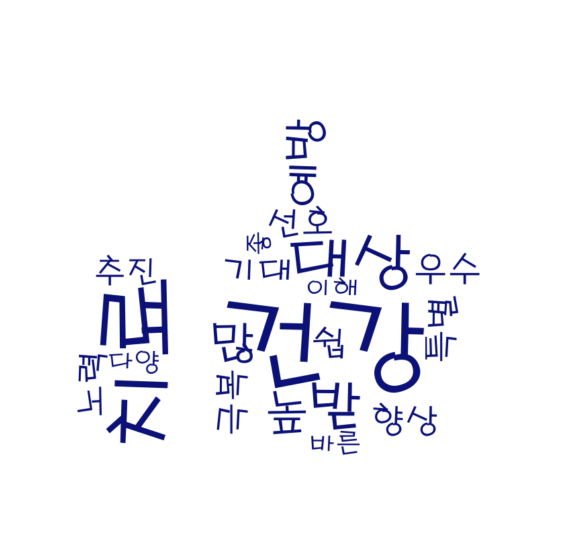

In [ ]:
wordcloud = WordCloud(font_path="H2PORL.TTF",
                      background_color="white", mask=cloud_mask)  # mask 형태의 wordcloud 생성
wc = wordcloud.generate_from_frequencies(pos_count) # pos_count 딕셔너리를 통해 wordcloud 생성
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
### https://www.w3schools.com/colors/colors_hexadecimal.asp
def color_func2(**kawargs):
    color="#f20101"
    return color

In [ ]:
img_path = 'bad.jpg'
cloud_mask = np.array(Image.open(img_path))
cloud_mask.shape

img = Image.open(img_path)
img.size

(831, 789)

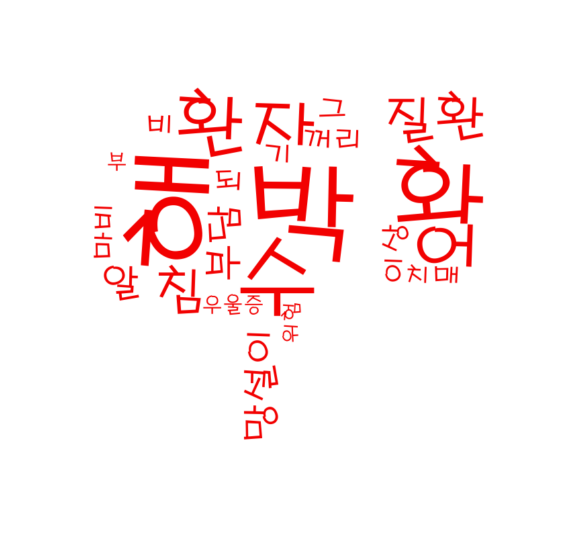

In [ ]:
wordcloud = WordCloud(font_path="H2PORL.TTF",
                      background_color="white", mask=cloud_mask)  # mask 형태의 wordcloud 생성
wc = wordcloud.generate_from_frequencies(neg_count)
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func2), interpolation='bilinear')
plt.axis("off")
plt.show()